# 1- Introduction.
>The data analyses that is presented here is based on the Ford Go bike dataset. It has data on bike share system for the month of February, 2019. It has 16 columns that record the following about each bike renting incident:
>1. Trip Duration, 
2. start and end time,
2. start and end stations and their longitudes and latitudes,
3. user type, birth year and gender.


In [1]:
# Importing required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import pylab as pl

In [2]:
bike_df=pd.read_csv('201902-fordgobike-tripdata.csv') # Reading the data into the bike_df variable

In [3]:
bike_df.shape # Getting the number of rows and columns

(183412, 16)

In [4]:
bike_df.info() # Checking the null values and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# Checking to see whether the start_station_id has the same number of values as the start_station_name
bike_df.start_station_id.nunique() == bike_df.start_station_name.nunique()

True

In [7]:
# Checking to see whether the end_station_id has the same number of values as the end_station_name
bike_df.end_station_id.nunique() == bike_df.end_station_name.nunique()

True

In [8]:
# Finding out the values of the user_type variable
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
# Finding out the values of the member_gender variable
bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

# 2- Data Wrangling

In [10]:
# Converting the start_time and the end_time fields into date_time objects
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)

In [11]:
# Getting the percentage of Null values to the whole dataframe
bike_df.isna().sum().sum()/bike_df.shape[0]

0.0944213028591368

In [12]:
# Dropping the null values
bike_df.dropna(inplace=True)

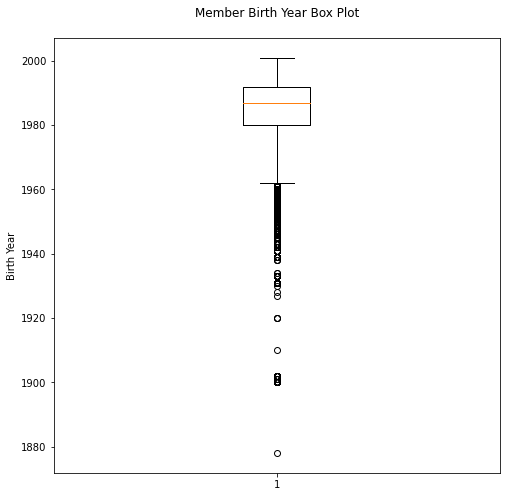

In [13]:
# Checking the member_birth_year filed for outliers.
plt.figure(figsize=(8, 8))
plt.title('Member Birth Year Box Plot\n')
plt.ylabel('Birth Year')    
plt.boxplot(bike_df.member_birth_year);

In [14]:
# Removing outliers from the member_birth_year field
bike_df=bike_df.query('member_birth_year>1966')

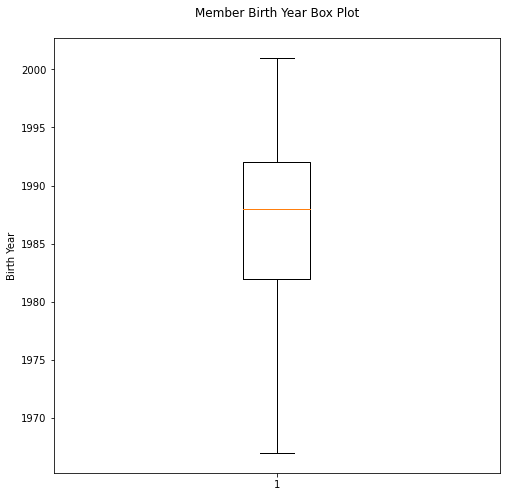

In [15]:
# Making sure that the outliers of birth year variable are removed
plt.figure(figsize=(8, 8))
plt.title('Member Birth Year Box Plot\n')
plt.ylabel('Birth Year')    
plt.boxplot(bike_df.member_birth_year.astype(int));

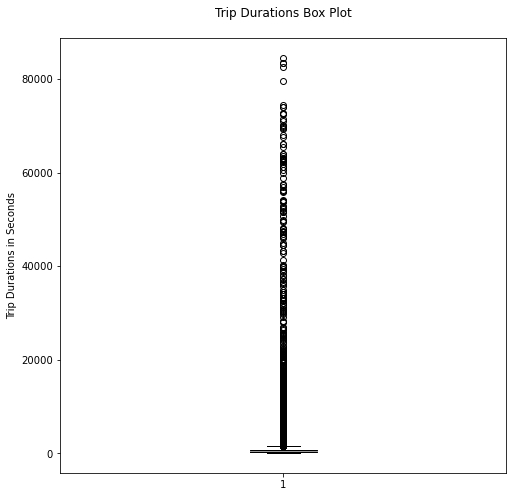

In [16]:
# Checking the duration_sec field for outliers.
plt.figure(figsize=(8, 8))
plt.title('Trip Durations Box Plot\n')
plt.ylabel('Trip Durations in Seconds')  
plt.boxplot(bike_df.duration_sec);

In [17]:
# With some trials and errors I found out that the trips durations that are more than 1310 seconds are outliers.
# They will be removed.
bike_df=bike_df.query('duration_sec<1310.0')

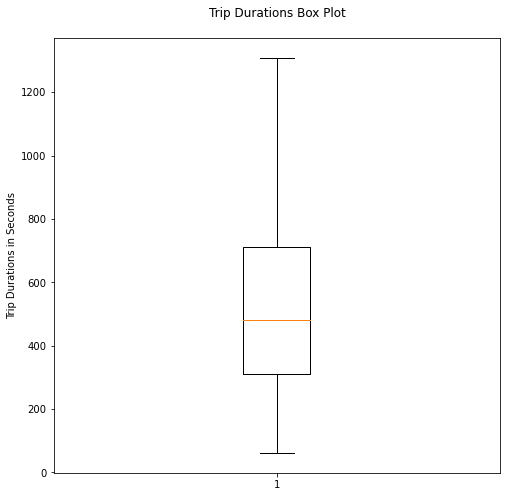

In [18]:
# Making sure that the outliers of duration_sec variable are removed
plt.figure(figsize=(8, 8))
plt.title('Trip Durations Box Plot\n')
plt.ylabel('Trip Durations in Seconds')  
plt.boxplot(bike_df.duration_sec);

In [19]:
# Checking the maximum and minimum values of the start_time and end_time variables in order to find out
# the range of the dates during which the bikes were rented.
print("Start Time Minimum:     ", bike_df.start_time.min())
print("Start Time Maximum:     ", bike_df.start_time.max())
print("End Time Minimum:       ", bike_df.end_time.min())
print("End Time Maximum:       ", bike_df.end_time.max())

Start Time Minimum:      2019-02-01 00:00:20.636000
Start Time Maximum:      2019-02-28 23:59:18.548000
End Time Minimum:        2019-02-01 00:04:52.058000
End Time Maximum:        2019-03-01 00:14:42.588000


In [20]:
# Calculating the approximate ages of the bike riders and saving them into a new variable named "approximate_age".
bike_df['approximate_age']=2019-bike_df.member_birth_year.astype(int)

In [21]:
# Checking the new variable values
print("The approximate ages of the bike riders sorted ascendingly.\n", sorted(bike_df.approximate_age.unique()))

The approximate ages of the bike riders sorted ascendingly.
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [22]:
# Creating a new variable named age_groups to hold the age group of each rider
mybins=[17,19,24,29,34,39,44,49,54]
bins_titles=['=< 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 52']
bike_df['age_groups']=pd.cut(bike_df['approximate_age'], mybins, labels=bins_titles)

In [23]:
# Checking the new variable
bike_df.age_groups.value_counts()

25 to 29    39517
30 to 34    39223
35 to 39    25053
20 to 24    19521
40 to 44    13380
45 to 49     9252
50 to 52     4287
=< 19        1460
Name: age_groups, dtype: int64

In [24]:
# Creating four new variables for the start and end times and days of the rides.
bike_df['start_hour']=bike_df.start_time.dt.hour
bike_df['end_hour']=bike_df.end_time.dt.hour
bike_df['start_day']=bike_df.start_time.dt.day_name()
bike_df['end_day']=bike_df.end_time.dt.day_name()

In [25]:
# Checking the new variables
print("Start Hours:  ", sorted(bike_df.start_hour.unique()))
print("End Hours:    ", sorted(bike_df.end_hour.unique()))
print("Start Days:   ", sorted(bike_df.start_day.unique()))
print("End Days:     ", sorted(bike_df.start_day.unique()))

Start Hours:   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
End Hours:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Start Days:    ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
End Days:      ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


# 3- Data Analysis

#### 1. Plotting the trips duration mean for each gender.

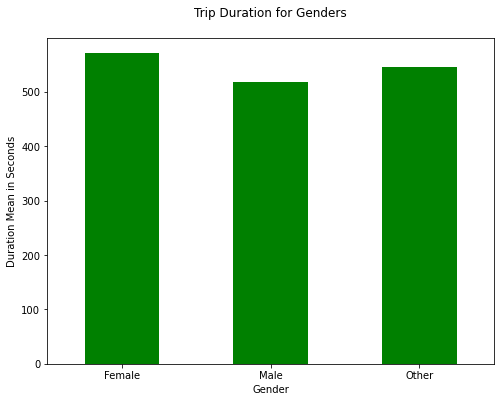

In [26]:
duration_gender=bike_df.groupby('member_gender').duration_sec.mean()
duration_gender.plot(kind = 'bar', title = 'Trip Duration for Genders\n',
            xlabel= 'Gender', ylabel='Duration Mean in Seconds', figsize = (8,6), color='green');
plt.xticks(rotation=0);

#### Trip duration varies slightly from gender to gender with the highest duration is for females and the lowest is for males.

#### 2. Plotting the trips count for each gender.

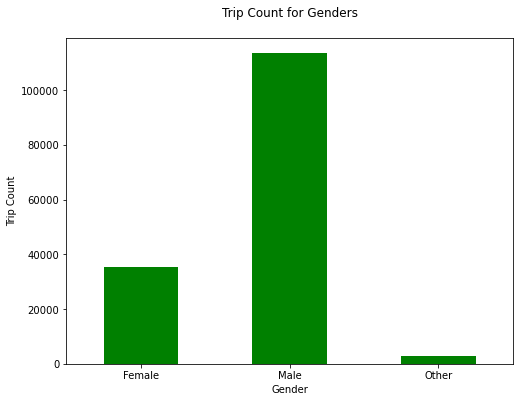

In [27]:
# Creating a panda series with the count of the trips for each gender
gender_count=bike_df.groupby('member_gender').duration_sec.count()

# Plotting the counts of the trips for each gender
gender_count.plot(kind = 'bar', title = 'Trip Count for Genders\n',
            xlabel= 'Gender', ylabel='Trip Count', figsize = (8,6), color='green');
plt.xticks(rotation=0);

#### The number of male riders is the greatest whereas the number of the "Other" gender is the smallest. The number of female riders comes in between male and other genders.

#### 3. Plotting the percentages of the different genders.

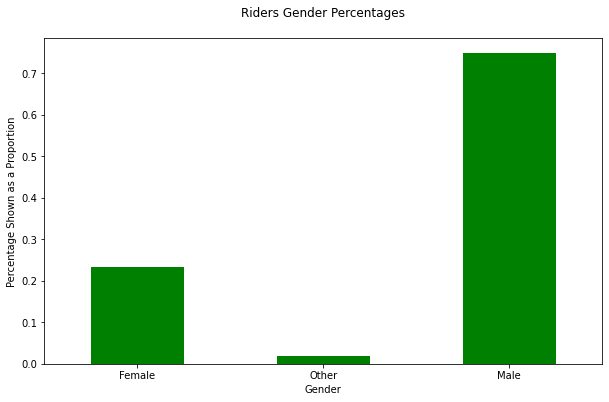

In [28]:
gender_percent=bike_df.member_gender.value_counts(sort=False)/bike_df.shape[0]
gender_percent.plot(kind = 'bar', title = 'Riders Gender Percentages\n',
            xlabel= 'Gender', ylabel='Percentage Shown as a Proportion', figsize = (10,6), color='green');
plt.xticks(rotation=0);

#### About 75% of the riders are males, and about 23% are females and the rest belong to the gender "other".

#### 4. Plotting the distribution of bike riders for the different hours of the day

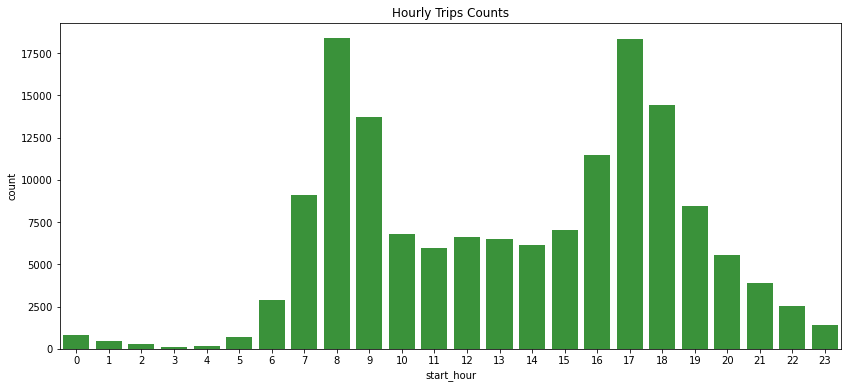

In [29]:
base_color = sb.color_palette()[2]
plt.figure(figsize=(14,6))
sb.countplot(x=bike_df.start_hour, color=base_color);
plt.title('Hourly Trips Counts');

#### More bikes are rented between 7 am and 9 am and between 4 pm and 6 pm. The least number of bikes is rented at 3:00 am. The most number is rented at 5:00 pm. From midnight to 4:00 am, the number of bike riders decreases gradually. Starting at 5:00 am, the number increases reaching its morning peak at 8:00 am. Then it decreases again until it almost stabilizes between 10:00 am and 3:00 pm. Then it increases again until it reaches its afternoon peak at 5:00 pm. Finally it decreases again reaching its lowest value at 3:00 am.

In [30]:
# Creating a dataframe for early rides that start between midnight and 6 am exclusive..
early_df=bike_df.query('start_hour<6')

# Creating a dataframe for rush hours rides that take place between 6:00 am and 10 am exclusive and 
# between 3:00 pm and 7:00 pm exclusive.
rush_df=bike_df.query('6<start_hour<10 or 15<start_hour<19' )

# Creating a dataframe for normal hours rides (any hour that is neither a rush hour nor an early hour is a normal hour).
normal_hours_df=bike_df.query('-1<start_hour<7 or 9<start_hour<16 or 18<start_hour<24' )

#### 5. Plotting the percentages of the different genders of early hours bike riders.

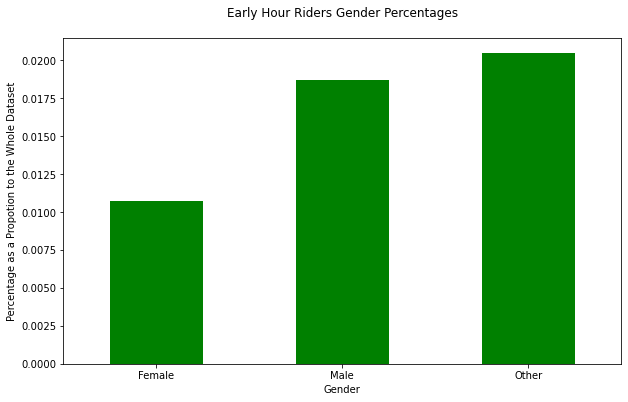

In [31]:
early_gender=early_df.member_gender.value_counts()/bike_df.member_gender.value_counts(sort=False)
early_gender.plot(kind = 'bar', title = 'Early Hour Riders Gender Percentages\n',
            xlabel= 'Gender', ylabel='Percentage as a Propotion to the Whole Dataset', figsize = (10,6), color='green');
plt.xticks(rotation=0);

#### The proportion of females who ride during the early hours to the total number of females in the dataset is the least. The "other" gender proportion is the highest and the male proportion comes in between.

#### 6. Plotting the percentages of the different genders of normal hours bike riders.

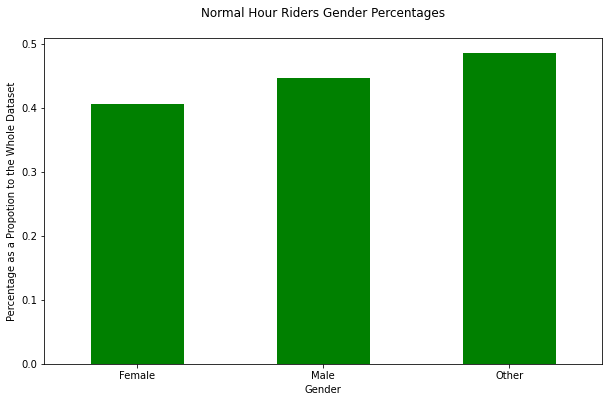

In [32]:
normal_gender=normal_hours_df.member_gender.value_counts()/bike_df.member_gender.value_counts(sort=False)
normal_gender.plot(kind = 'bar', title = 'Normal Hour Riders Gender Percentages\n',
            xlabel= 'Gender', ylabel='Percentage as a Propotion to the Whole Dataset', figsize = (10,6), color='green');
plt.xticks(rotation=0);

#### The gender distribution for riders during the normal hours is similar to that one of the early riders plotted i n the previous slide though with smaller differences between the percentages of genders.

#### 7. Plotting the percentages of the different genders of rush-hour bike riders.

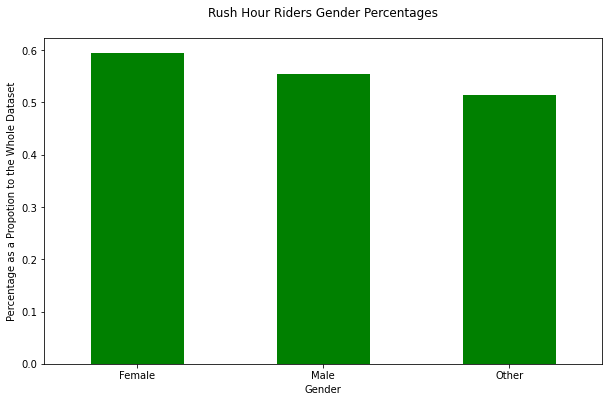

In [33]:
rush_gender=rush_df.member_gender.value_counts()/bike_df.member_gender.value_counts(sort=False)
rush_gender.plot(kind = 'bar', title = 'Rush Hour Riders Gender Percentages\n',
            xlabel= 'Gender', ylabel='Percentage as a Propotion to the Whole Dataset', figsize = (10,6), color='green');
plt.xticks(rotation=0);

#### The gender distribution for riders percentages during the rush hours is different from their distribution during both the normal and the early hours. During the rush hours, the proportion of female riders is higher than the proportion of the other genders. The proportion of males is higher than the proportion of the "Other" gender.

#### 8. Is there an age group that has more riders than other age groups?

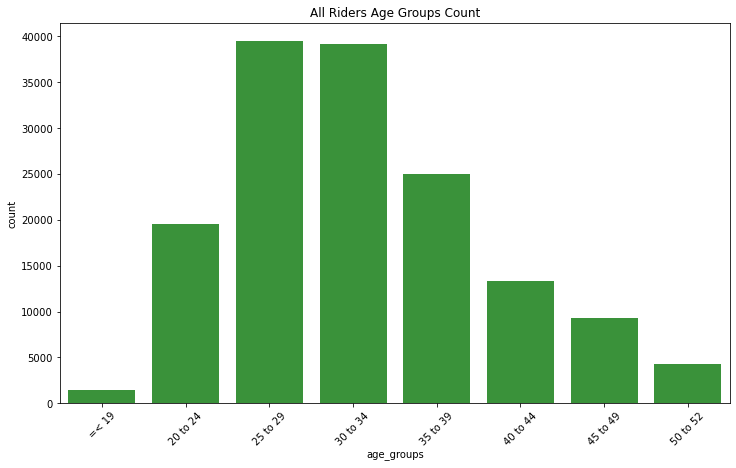

In [34]:
# Distribution of riders over age groups
base_color = sb.color_palette()[2]
plt.figure(figsize=(12,7))
sb.countplot(x=bike_df.age_groups, color=base_color)
plt.title('All Riders Age Groups Count')
plt.xticks(rotation=45);

#### The count of riders for ages 25 to 34 is higher than the count of riders in the remaining ages. In general, the riders are normally distributed over the different ages with more young riders than old ones. 

#### 9. Plotting the number of Male Riders for each age group.

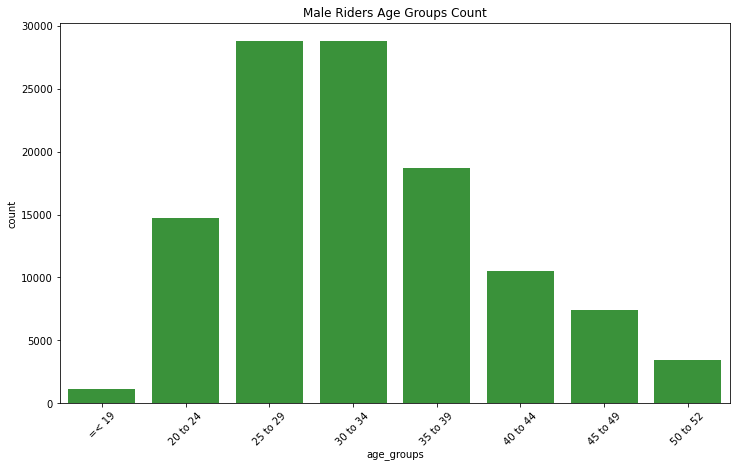

In [35]:
# Creating a dataframe for the male riders
male_df=bike_df.query('member_gender=="Male"')

# Plotting the male riders distribution over the age groups.
base_color = sb.color_palette()[2]
plt.figure(figsize=(12,7))
sb.countplot(x=male_df.age_groups, color=base_color)
plt.title('Male Riders Age Groups Count')
plt.xticks(rotation=45);

#### The male distribution over age groups is similar to the distribution of all riders over age groups.

#### 10. Plotting the number of Female Riders for each age group.

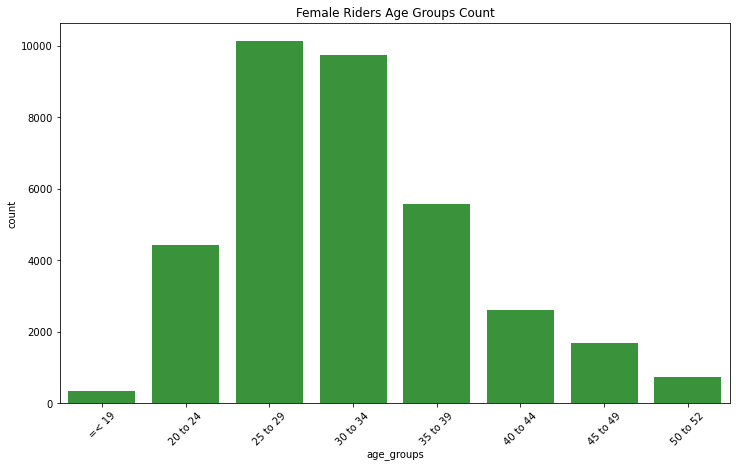

In [36]:
# Creating a dataframe for the female riders
female_df=bike_df.query('member_gender=="Female"')

# Plotting the female riders distribution over the age groups.
base_color = sb.color_palette()[2]
plt.figure(figsize=(12,7))
sb.countplot(x=female_df.age_groups, color=base_color)
plt.title('Female Riders Age Groups Count')
plt.xticks(rotation=45);

#### The female distribution over age groups is similar to the distribution of all riders over age groups.

#### 11. Plotting the number of "Other" gender Riders for each age group.

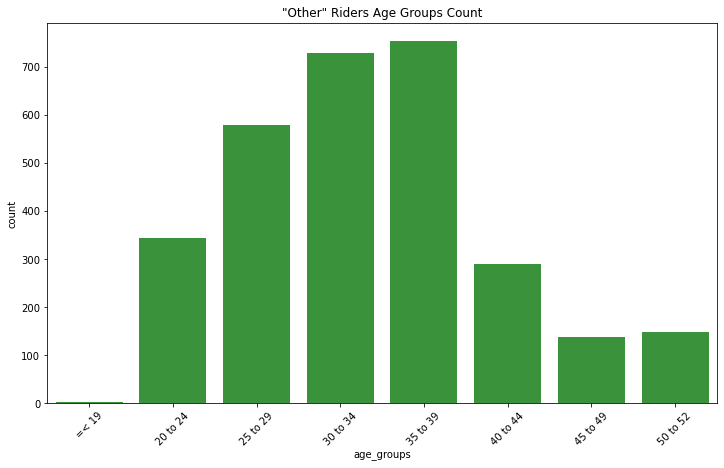

In [37]:
# Creating a dataframe for the "Other" gender riders
other_df=bike_df.query('member_gender=="Other"')

# Plotting the "Other" gender riders distribution over the age groups.
base_color = sb.color_palette()[2]
plt.figure(figsize=(12,7))
sb.countplot(x=other_df.age_groups, color=base_color)
plt.title('"Other" Riders Age Groups Count')
plt.xticks(rotation=45);

#### The 'Other' gender distribution over age groups is similar to the distribution of all riders over age groups.

#### 12. Is there a correlation between age and trip duration?

In [38]:
# Creating a data series with the age groups and duration
age_duration=bike_df.groupby('age_groups').duration_sec.mean()

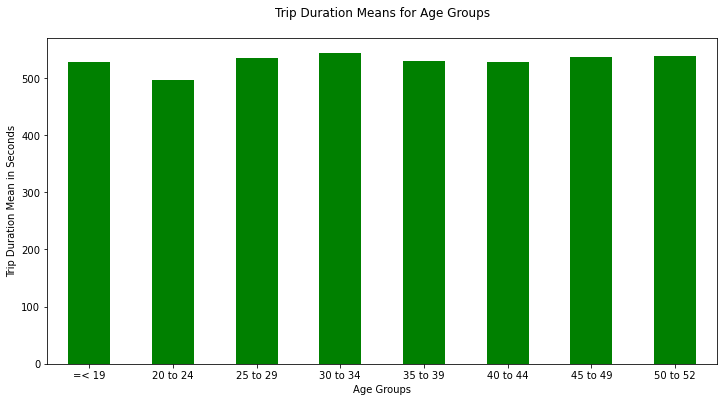

In [39]:
age_duration.plot(kind = 'bar', title = 'Trip Duration Means for Age Groups\n',
            xlabel= 'Age Groups', ylabel='Trip Duration Mean in Seconds', figsize = (12,6), color='green');
plt.xticks(rotation=0);

#### It seems that there is little variation in trip means with regard to age groups. Riders aged 20 to 24 have trip duration mean that is slightly lower than the trip duration means of the rest of the riders.

#### 13. Comparing the number of riders in each gender with the trip duration mean for each gender.

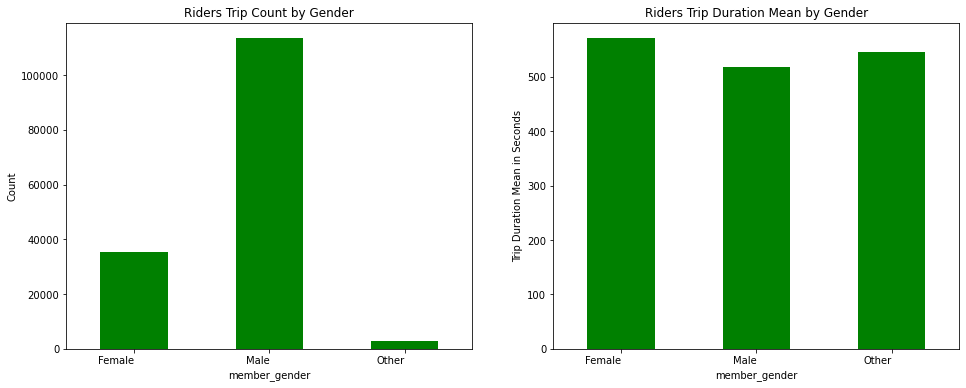

In [40]:
# Getting the count of the riders in each gender
gender_count = bike_df.groupby('member_gender').duration_sec.count()
# Getting the average of trip durations for each gender
gender_duration=bike_df.groupby('member_gender').duration_sec.mean()
#Plotting both the count and duration mean of the trips of each gender
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
gender_count.plot(kind='bar', ax=ax1, color = 'green', title='Riders Trip Count by Gender', ylabel='Count');
gender_duration.plot(kind='bar', ax=ax2, color = 'green', title='Riders Trip Duration Mean by Gender', ylabel='Trip Duration Mean in Seconds');
plt.setp(ax1.get_xticklabels(), rotation=0, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=0, ha='right')
plt.show()

#### Although there are more males than females and there are more females than other, the trip duration means for the three genders are similar with minor differences.

#### 14. Comparing trip duration means and counts for subscribers and customers.

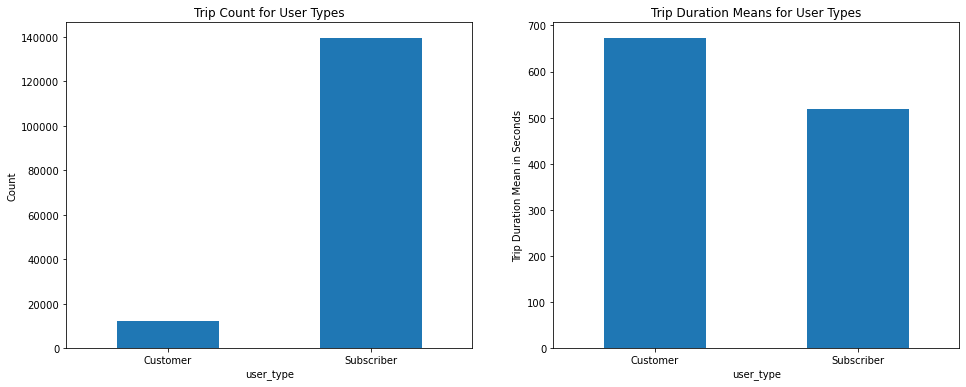

In [41]:
user_type_count_over_ages=bike_df.groupby('user_type').duration_sec.count()
user_type_duration_over_ages=bike_df.groupby('user_type').duration_sec.mean()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
user_type_count_over_ages.plot(kind='bar',ax=ax1, title='Trip Count for User Types', ylabel ='Count');
user_type_duration_over_ages.plot(kind='bar', ax=ax2, title='Trip Duration Means for User Types', ylabel='Trip Duration Mean in Seconds');
plt.setp(ax1.get_xticklabels(), rotation=0, ha='center')
plt.setp(ax2.get_xticklabels(), rotation=0, ha='center')
plt.show()

#### The two plots above show that though the customers represent a minority in the dataset, their trip duration mean is higher than that of the subscribers.

#### 15. Comparing trip duration means of the three genders for both subscribers and customers.

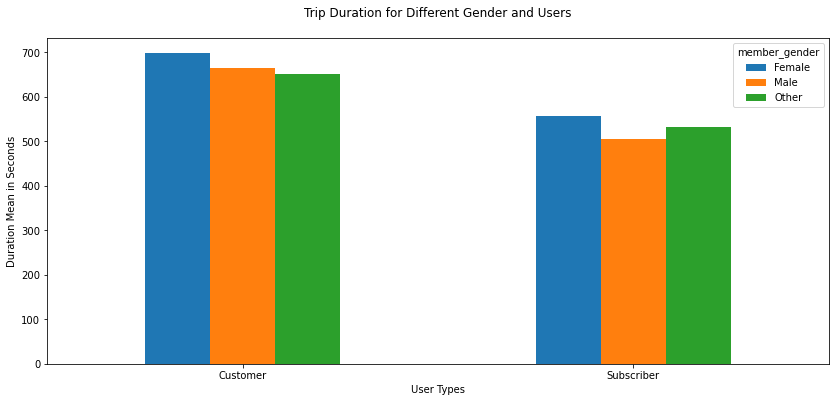

In [42]:
duration_over_ages=bike_df.groupby(['user_type', 'member_gender']).duration_sec.mean().unstack()
duration_over_ages.plot(kind = 'bar', title = 'Trip Duration for Different Gender and Users\n',
            xlabel= 'User Types', ylabel='Duration Mean in Seconds', figsize = (14,6));
plt.xticks(rotation=0);

#### In general, the average trip duration of the customers is higher than that of the subscribers as it was found out from the two plots before that last one. The female riders' trip duration average is the highest for both types of users. The "Other" gender has the shortest trip duration mean among the customers whereas the males have the shortest duration mean among the subscribers.

#### 16. Comparing the trip duration means of each gender in each age group.

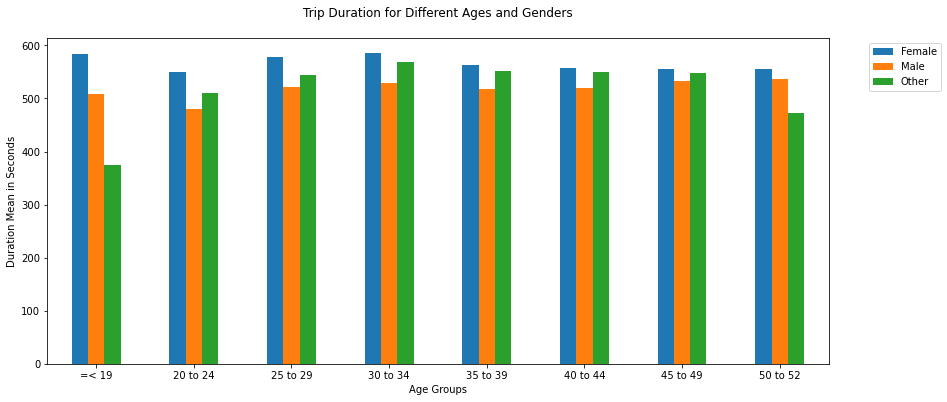

In [43]:
age_gender_duration=bike_df.groupby(['age_groups', 'member_gender']).duration_sec.mean().unstack()
age_gender_duration.plot(kind = 'bar', title = 'Trip Duration for Different Ages and Genders\n',
            xlabel= 'Age Groups', ylabel='Duration Mean in Seconds', figsize = (14,6));
plt.legend(bbox_to_anchor=(1.15, 1));
plt.xticks(rotation=0);

#### In general, the trip duration means for the different ages and genders are similar with very small differences. The females trip durations are a little bit higher for all age groups. The males trip durations are slightly shorter than the other two genders for most age groups. Only riders aged 19 or less show very short tip duration mean of about 350 seconds for the "other" gender. Again, the differences are minor and not practically significant.

#### 17. Comparing the gender percentages for each age group.

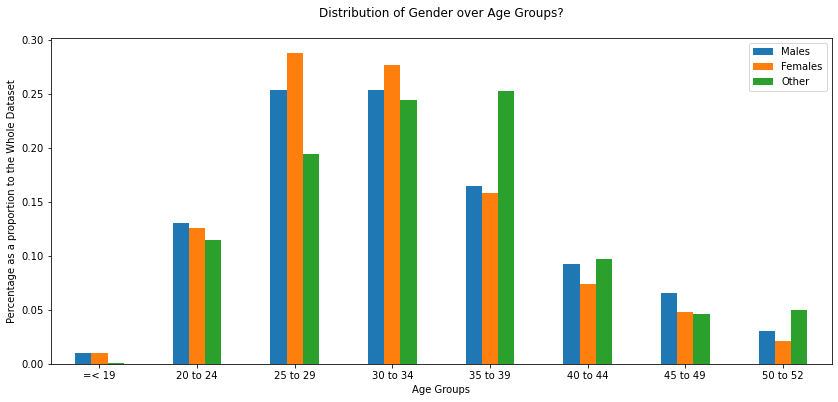

In [44]:
# Creating dataframes for the three genders
males=bike_df[bike_df['member_gender']=='Male']
females=bike_df[bike_df['member_gender']=='Female']
other=bike_df[bike_df['member_gender']=='Other']
# Calculating the proportion of each gender in each age group to the whole number of genders.
m=males.age_groups.value_counts()/males.shape[0]
f=females.age_groups.value_counts()/females.shape[0]
o=other.age_groups.value_counts()/other.shape[0]
# Creating a dataframe with the proportions calculated above.
c=pd.DataFrame({'Males':m,'Females':f, 'Other':o})
# Plotting the percentages of each gender in each age group
c.plot(kind = 'bar', title = 'Distribution of Gender over Age Groups?\n',
            xlabel= 'Age Groups', ylabel='Percentage as a proportion to the Whole Dataset', figsize = (14,6));
plt.xticks(rotation=0);

#### Each gender is normally distributed over the different age groups with the highest percentages in ages between 25 and 39. The percentages of females in most age groups is lower than that of males except for ages between 25 and 34 . The "other" gender is lower than both males and females except in ages between 35 and 39, between 40 and 44 and between 50 and 52.

#### 18. Comparing the trips counts of the different genders with the trips duration mean of each gender for each day of the week.

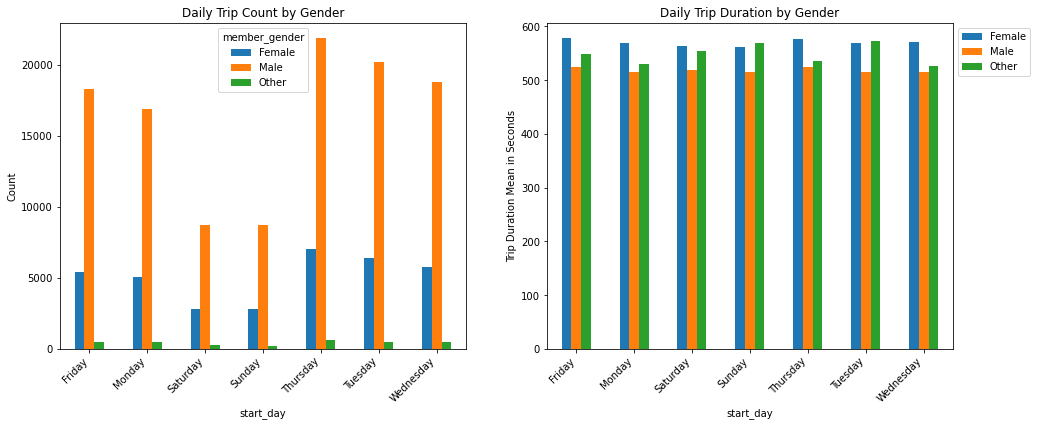

In [45]:
agg_trip_count=bike_df.groupby(['start_day', 'member_gender'])['duration_sec'].count().unstack()
agg_trip_duration=bike_df.groupby(['start_day', 'member_gender'])['duration_sec'].mean().unstack()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
agg_trip_count.plot(kind='bar',ax=ax1, title='Daily Trip Count by Gender', ylabel ='Count');
agg_trip_duration.plot(kind='bar', ax=ax2, title='Daily Trip Duration by Gender', ylabel='Trip Duration Mean in Seconds');
plt.legend(bbox_to_anchor=(1, 1));
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### The left plot shows that the number of riders is higher on weekdays than on weekends. Moreover, the male count is higher than the other two genders and the "Other" gender is the least. The right plot shows that the trip duration means are similar for the different days with minor insignificant differences. Also the trip duration means show very small differences among the different genders.

In [46]:
def compare_count_duration(df, title_1=None, title_2=None):
    # This function is used to compare the count of the trips and their duation means for the different genders over the 
    # days of the week. It will be used to carry out comparisons for the different times of the day, i.e. rush hours, 
    # normal hous and early hours.
    count = df.groupby(['start_day', 'member_gender'])['duration_sec'].count().unstack()
    duration = df.groupby(['start_day', 'member_gender'])['duration_sec'].sum().unstack()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
    count.plot(kind='bar', stacked=True, ax=ax1, title=title_1, ylabel='Count');
    duration.plot(kind='bar', stacked=True, ax=ax2, title= title_2, ylabel='Duration Total in Seconds');
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    plt.show()

#### 19- Comparing the number of early hours riders with their trip duration means for each gender and day.

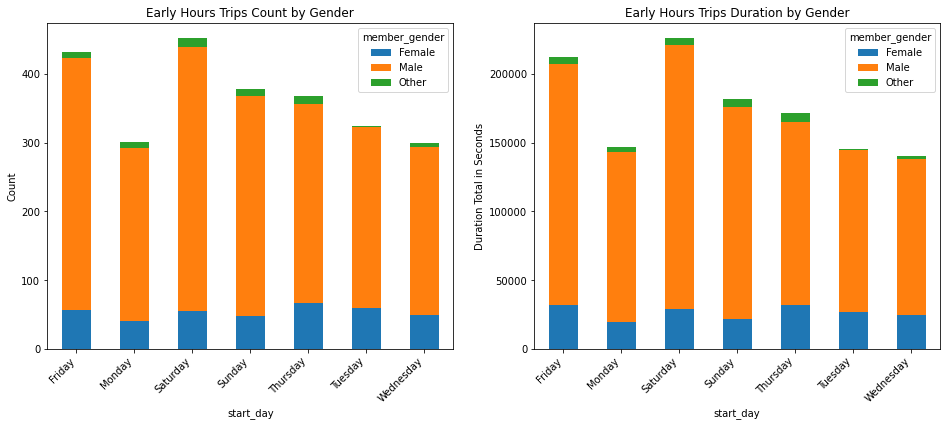

In [47]:
compare_count_duration(early_df, 'Early Hours Trips Count by Gender', 'Early Hours Trips Duration by Gender')


#### Both the count and duration of the early hours trips are similar. The biggest number of rides and the longest ride periods are on Sundays. So there is a tendency for all genders to go on bike rides on early hours on Sundays more than on any other day. The smallest number of rides and the shortest ride periods are on Mondays.

#### 20. Comparing the number of rush hours riders with their trip duration means for each gender and day.

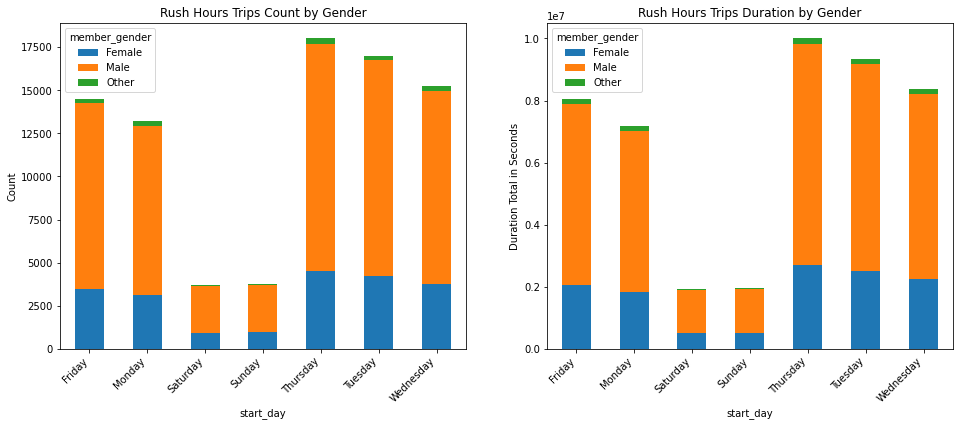

In [48]:
compare_count_duration(rush_df, 'Rush Hours Trips Count by Gender', 'Rush Hours Trips Duration by Gender')

#### Both the count and duration of the rush hours trips are similar. The smallest number of rides and the shortest ride periods are on weekends. So there is a tendency for all genders to go on bike rides on rush hours on weekdays more than on weekends. 

#### 21. Comparing the number of normal hours riders with their trip duration means for each gender and day.

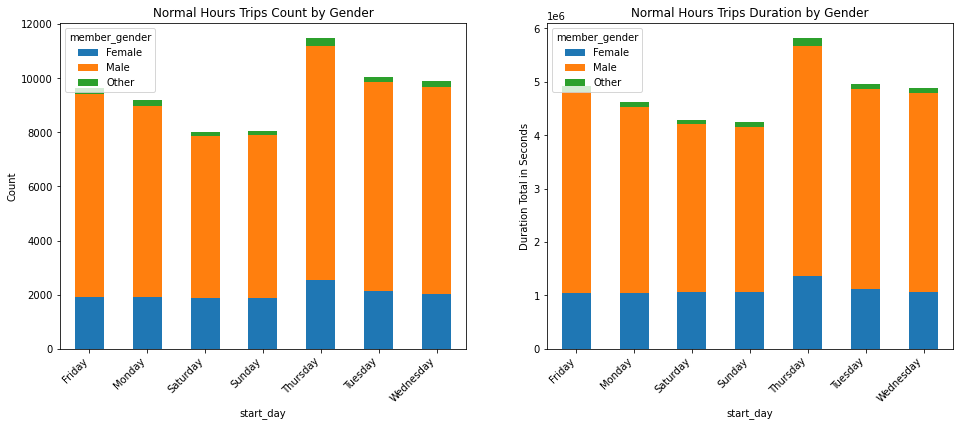

In [49]:
compare_count_duration(normal_hours_df, 'Normal Hours Trips Count by Gender', 'Normal Hours Trips Duration by Gender')

#### Both the count and duration of the normal hours trips are similar. The smallest number of rides and the shortest ride periods are on weekends. So there is a tendency for all genders to go on bike rides on normal hours on weekdays more than on weekends. 